##### Problem statement
Given File 'startup_funding.csv'

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

##### Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

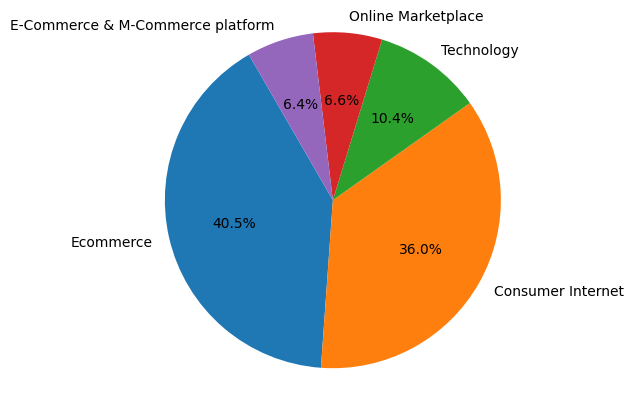

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

file_path  = 'startup_funding.csv'
file_obj = pd.read_csv(file_path)

file_obj.dropna(subset=['IndustryVertical'],inplace=True)
file_obj['IndustryVertical']=file_obj['IndustryVertical'].replace({
  'ecommerce':'Ecommerce',
  'ECommerce':'Ecommerce',
  'eCommerce':'Ecommerce'
})

file_obj.loc[:,'AmountInUSD']=pd.to_numeric(file_obj.loc[:,'AmountInUSD'].str.replace(',',''),errors='coerce')
amount=file_obj.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)
tot_amount = file_obj['AmountInUSD'].sum()

per = (amount/tot_amount)*100
per_value = round(per,2)[:5]

plt.pie(per_value,labels=per_value.index,autopct='%.1f%%',startangle=120)
plt.axis('equal')
plt.show()